In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [86]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [89]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [90]:
# age and deck having null values
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [91]:
df['age'].fillna(df['age'].median(), inplace=True)

In [92]:
df.shape

(891, 15)

In [93]:
df = df.drop('deck', axis = 1)

In [94]:
df.info()
df['embarked'] = df['embarked'].fillna('S')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [95]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [96]:
df['class'] = df['class'].map({'First':0, 'Second' : 1, 'Third' : 2})
df['class'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [97]:
df['class'] = df['class'].astype('int')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    int32  
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(4), object(5)
memory usage: 81.9+ KB


In [99]:
df = df.drop(['adult_male', 'embark_town', 'alive', 'alone'], axis=1)

In [100]:
df['gender'] = df['who']
df = df.drop(['who'], axis=1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   class     891 non-null    int32  
 9   gender    808 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 66.3+ KB


In [105]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [106]:
df['gender'].unique()

array([0., 1.])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   class     891 non-null    int32  
 9   gender    891 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 66.3+ KB


In [109]:
df = df.drop('gender', axis = 1)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   class     891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [113]:
df['sex'] = df['sex'].map({'male':1, 'female':0})
df['sex'].unique()

array([1, 0], dtype=int64)

In [115]:
df['embarked'] = df['embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int32  
 8   class     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [116]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
dtype: int64

In [122]:
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  775 non-null    int64  
 1   pclass    775 non-null    int64  
 2   sex       775 non-null    int64  
 3   age       775 non-null    float64
 4   sibsp     775 non-null    int64  
 5   parch     775 non-null    int64  
 6   fare      775 non-null    float64
 7   embarked  775 non-null    int32  
 8   class     775 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 54.5 KB


<Axes: >

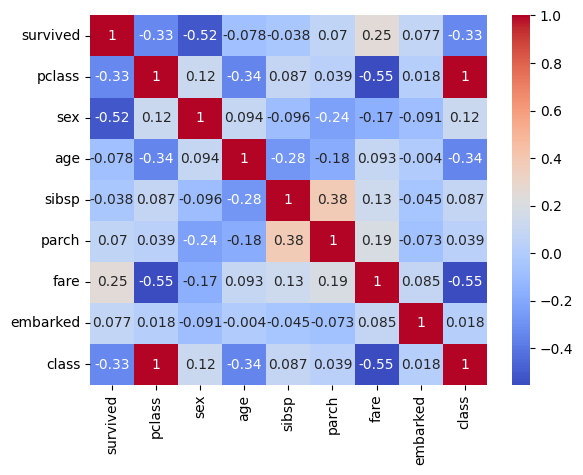

In [123]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [124]:
df = df.drop('class', axis=1)

In [125]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

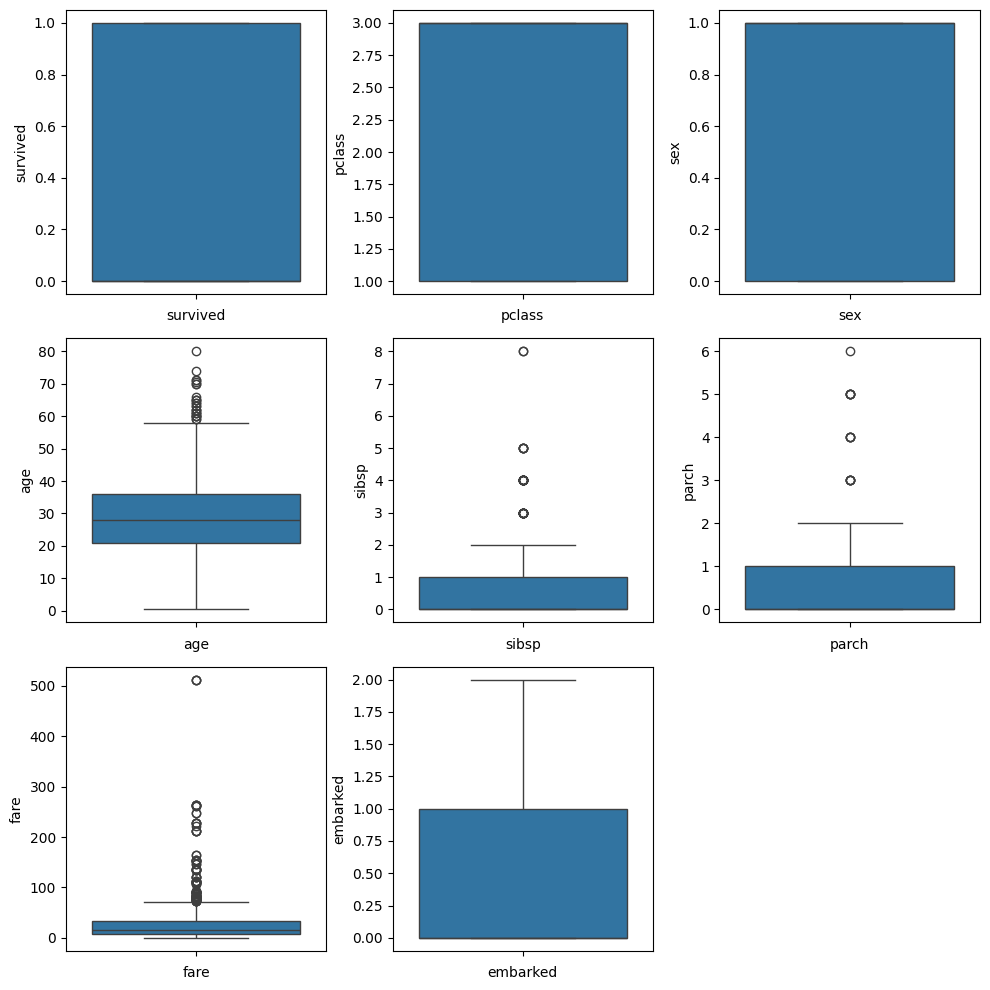

In [143]:
plt.figure(figsize=(10, 10))  # Correct way to specify figsize

# Initialize plot number (start from 1)
plotnumber = 1

# Iterate over each numeric column
for col in df.columns:
    plt.subplot(3, 3, plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize=10)
    plotnumber += 1

# Adjust layout
plt.tight_layout()

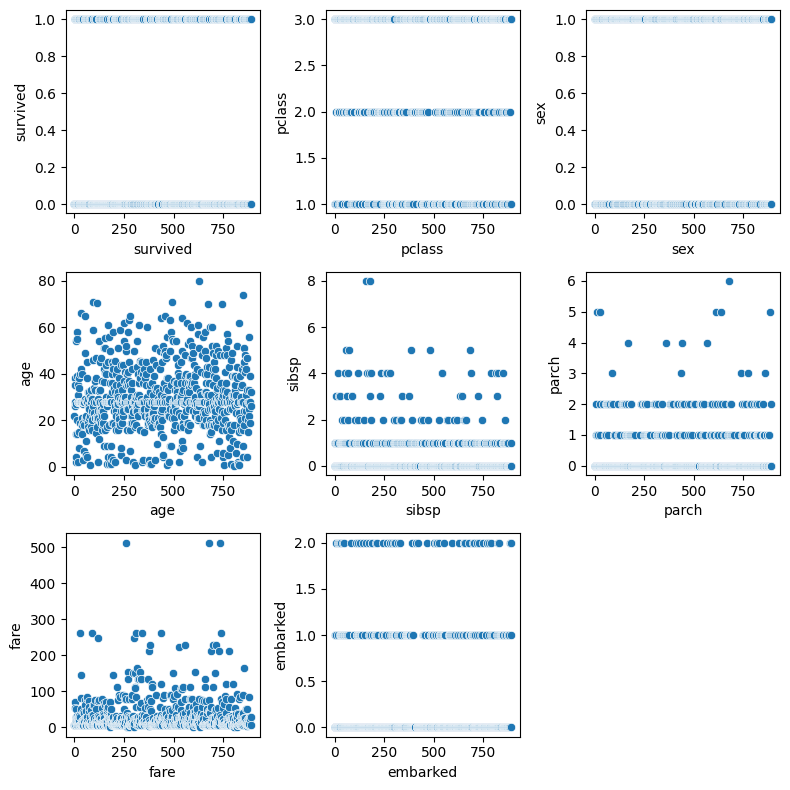

In [145]:
plt.figure(figsize=(8,8))  # Correct way to specify figsize

# Initialize plot number (start from 1)
plotnumber = 1

# Iterate over each numeric column
for col in df.columns:
    plt.subplot(3, 3, plotnumber)
    sns.scatterplot(df[col])
    plt.xlabel(col, fontsize=10)
    plotnumber += 1

# Adjust layout
plt.tight_layout()

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [164]:
models = {'LogisticRegression': LogisticRegression(),
           'SupportVectorClassifier' : SVC(), 
           'RandomForestClassifier' : RandomForestClassifier(),
           'GradientBoostingClassifier' : GradientBoostingClassifier(),
           'KNeighborsClassifier' : KNeighborsClassifier()
           }


In [165]:
X = df.drop('survived', axis =1)
y = df[['survived']]

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((620, 7), (155, 7), (620, 1), (155, 1))

In [171]:
# scaling the data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.fit_transform(X_test)

X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.fit_transform(X_test)

In [183]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

def evaluate(models, X_train, X_test, y_train, y_test):
    
    for model_name in models:
        model = models[model_name]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        print(f"{model_name} R2 score: {(score*100):.2f}%")
        print(f"{model_name} MSE: {mean_squared_error(y_test, y_pred):.2f}")



In [184]:
print('*'*20, 'StandardScaler', '*'*20)
evaluate(models, X_train_ss, X_test_ss, y_train, y_test)
print('*'*20, 'MinMaxScaler', '*'*20)
evaluate(models, X_train_mm, X_test_mm, y_train, y_test)
print('*'*20, 'RobustScaler', '*'*20)
evaluate(models, X_train_rs, X_test_rs, y_train, y_test)

******************** StandardScaler ********************
LogisticRegression R2 score: 76.77%
LogisticRegression MSE: 0.23
SupportVectorClassifier R2 score: 82.58%
SupportVectorClassifier MSE: 0.17
RandomForestClassifier R2 score: 76.77%
RandomForestClassifier MSE: 0.23
GradientBoostingClassifier R2 score: 76.77%
GradientBoostingClassifier MSE: 0.23
KNeighborsClassifier R2 score: 76.13%
KNeighborsClassifier MSE: 0.24
******************** MinMaxScaler ********************
LogisticRegression R2 score: 79.35%
LogisticRegression MSE: 0.21
SupportVectorClassifier R2 score: 81.29%
SupportVectorClassifier MSE: 0.19
RandomForestClassifier R2 score: 77.42%
RandomForestClassifier MSE: 0.23
GradientBoostingClassifier R2 score: 80.65%
GradientBoostingClassifier MSE: 0.19
KNeighborsClassifier R2 score: 74.19%
KNeighborsClassifier MSE: 0.26
******************** RobustScaler ********************
LogisticRegression R2 score: 77.42%
LogisticRegression MSE: 0.23
SupportVectorClassifier R2 score: 83.23%
S

In [193]:
# hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
param_grid = {
  'learning_rate': [0.1, 0.01, 0.001],
  'n_estimators': [100, 200, 400],
  'max_depth':  [4, 6, 8]
}
gcv = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc', verbose=3)
gcv.fit(X_train_rs, y_train_rs) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.876 total time=   0.8s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.894 total time=   2.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.838 total time=   0.8s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.810 total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100;, score=0.752 total time=   1.2s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.870 total time=   2.3s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.892 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.858 total time=   1.4s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.811 total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=200;, score=0.743 total t

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 200, 400]},
             scoring='roc_auc', verbose=3)

In [194]:
gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}

In [195]:
gcv.best_score_

0.836298076923077

In [198]:
from sklearn.metrics import accuracy_score
best_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth = 4, n_estimators=400 )
best_model.fit(X_train_rs, y_train)
ypred = best_model.predict(X_test_rs)
print("Accuracy: ", accuracy_score(y_test, ypred)*100)

Accuracy:  80.0
